这是tensorflow的使用笔记 基于mf的视频

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],[2]])

In [3]:
product = tf.matmul(matrix1,matrix2)

# Session是用来控制运行的 前面的tf相关操作都是静态建图

方法一

In [4]:
sess = tf.Session()
result = sess.run(product)

In [5]:
print(result)
sess.close()

[[12]]


#方法二

In [6]:
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)

[[12]]


# Variable

In [7]:
state = tf.Variable(0 , name='counter')
one = tf.constant(1)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
new_value = tf.add(state , one)
update = tf.assign(state,new_value)

In [9]:
init = tf.global_variables_initializer()

# Variable 使用之前一定要initial

In [10]:
with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

1
2
3


# placeholder 用于传值

In [11]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

In [12]:
output = tf.multiply(input1,input2)

In [13]:
with tf.Session() as sess:
    print( sess.run( output, feed_dict={input1:[7.],input2:[2.]}) )

[14.]


# 添加层

In [14]:
def add_layer(inputs, in_size, out_size, activation_function = None ):
    Weight = tf.Variable(tf.random_normal([in_size,out_size]) )
    biases = tf.Variable(tf.zeros([1,out_size]) + 0.1 )
    Wx_plus_b = tf.matmul(tf.cast(inputs,tf.float32),Weight) + biases
    if activation_function is None:
        outputs =  Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [15]:
x_dat= np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_dat.shape)
y_dat = np.square(x_dat) - 0.5 + noise

In [16]:
xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])
l1 = add_layer( xs , 1 , 10 , activation_function = tf.nn.relu )
prediction = add_layer( l1 , 10 , 1 , activation_function = None )

In [17]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                                 reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [18]:
init = tf.global_variables_initializer()

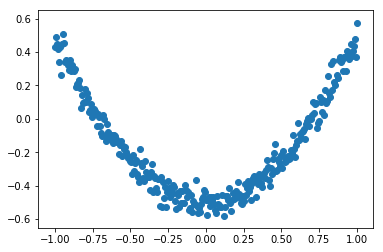

In [19]:
sess = tf.Session()
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_dat,y_dat)
plt.ion()
plt.show()
for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_dat,ys:y_dat})
    if i%50==0 :
        #print(sess.run(loss, feed_dict={xs:x_dat , ys:y_dat}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run( prediction,feed_dict={xs:x_dat})
        lines=ax.plot(x_dat,prediction_value,'r-',lw=15)
        plt.pause(0.2)
        